Užduotys

1. Apskaičiuokite bendrą pardavimų sumą ir vidutinį pardavimų skaičių. Sukurkite linijinę diagramą, kuri parodys pardavimų sumos pokyčius laikui bėgant.

1989250


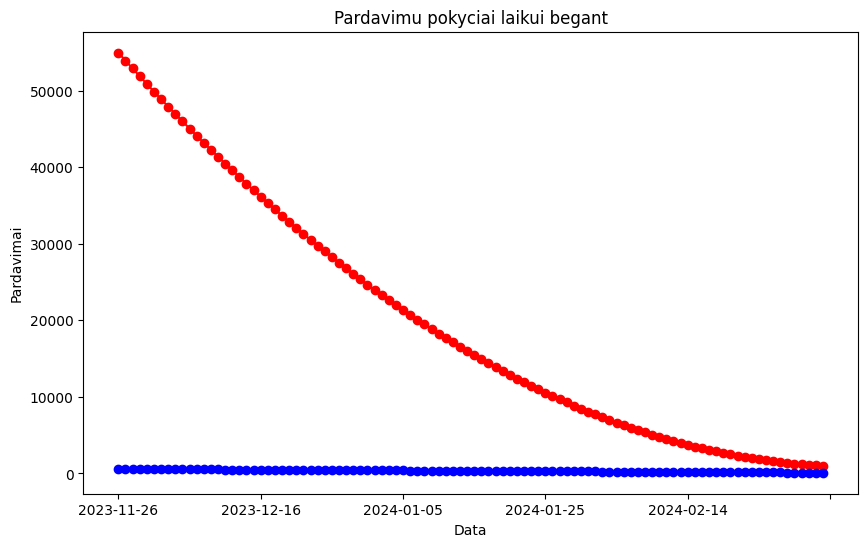

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

#Sprendimas:


sales = "sales.csv"
df = pd.read_csv(sales)
pardavimu_suma = df['Pardavimų suma'].sum()
print(pardavimu_suma)
bendra_pardavimu_suma = df.groupby('Data')['Pardavimų suma'].sum().sort_values(ascending=False)
#print(bendra_pardavimu_suma)

vidutinis_pardavimu_skaicius = df.groupby('Data')['Pardavimų skaičius'].mean().sort_values(ascending=False)
#print(vidutinis_pardavimu_skaicius)

   
plt.figure(figsize=(10, 6))
bendra_pardavimu_suma.plot(kind='line',color='red', marker='o', linestyle='-')
vidutinis_pardavimu_skaicius.plot(kind='line', color='blue',marker='o', linestyle='-')
plt.title('Pardavimu pokyciai laikui begant')
plt.xlabel('Data')
plt.ylabel('Pardavimai')

plt.show()


Filtruokite duomenis pagal tam tikras sąlygas. Pavyzdžiui, galite išrinkti visas dienas, kai pardavimų suma viršijo 10000. 

In [74]:
#Sprendimas:
#df['Pardavimai virsyjo 10000'] = df['Pardavimų suma'] > 10000

pardavimu_suma_virsija_10000 = df[df['Pardavimų suma'] > 10000]
print(pardavimu_suma_virsija_10000)


         Data  Pardavimų suma  Pardavimų skaičius  Menesis  \
38 2024-01-26           10120                 290        1   
39 2024-01-25           10555                 295        1   
40 2024-01-24           11000                 300        1   
41 2024-01-23           11455                 305        1   
42 2024-01-22           11920                 310        1   
..        ...             ...                 ...      ...   
95 2023-11-30           50875                 575       11   
96 2023-11-29           51880                 580       11   
97 2023-11-28           52895                 585       11   
98 2023-11-27           53920                 590       11   
99 2023-11-26           54955                 595       11   

    Pardavimai virsyjo 10000  
38                      True  
39                      True  
40                      True  
41                      True  
42                      True  
..                       ...  
95                      True  
96     

3. Grupuokite duomenis pagal mėnesį ir apskaičiuokite vidutines pardavimų sumas bei pardavimų skaičių kiekvienam mėnesiui.

In [69]:
#Sprendimas:


df['Data'] = pd.to_datetime(df['Data'])
df['Menesis'] = df['Data'].dt.month.sort_values(ascending=True)
#print(df['Menesis'])


vidutinis_pardavimu_sumos_menesiui_kiekvienamMEN = df.groupby('Menesis').agg({'Pardavimų suma':'mean', 'Pardavimų skaičius':'mean'})


print(f'Vidutines pardavimu sumos ir pardavimu skaicius kievienam menesiui:{vidutinis_pardavimu_sumos_menesiui_kiekvienamMEN}')




Vidutines pardavimu sumos ir pardavimu skaicius kievienam menesiui:         Pardavimų suma  Pardavimų skaičius
Menesis                                    
1               15320.0               340.0
2                3870.0               190.0
3                1092.5               107.5
11              52905.0               585.0
12              36555.0               495.0


4. Sukurkite išplėstines vizualizacijas, pavyzdžiui, stulpelinę diagramą, kuri vaizduoja vidutines mėnesines pardavimų sumas, ir linijinę diagramą pardavimų skaičiui toje pačioje ašyje naudojant dvigubą ašį (twin axis).

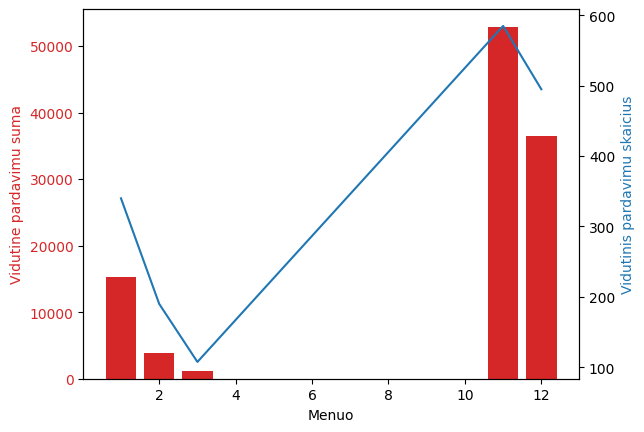

In [70]:
# Sprendimas:
fig, ax1 = plt.subplots()
color='tab:red'
ax1.set_xlabel('Menuo')
ax1.set_ylabel('Vidutine pardavimu suma', color=color)
ax1.bar(vidutinis_pardavimu_sumos_menesiui_kiekvienamMEN.index, vidutinis_pardavimu_sumos_menesiui_kiekvienamMEN['Pardavimų suma'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2= ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Vidutinis pardavimu skaicius', color=color)
ax2.plot(vidutinis_pardavimu_sumos_menesiui_kiekvienamMEN.index, vidutinis_pardavimu_sumos_menesiui_kiekvienamMEN['Pardavimų skaičius'], color=color)
plt.show()
